In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

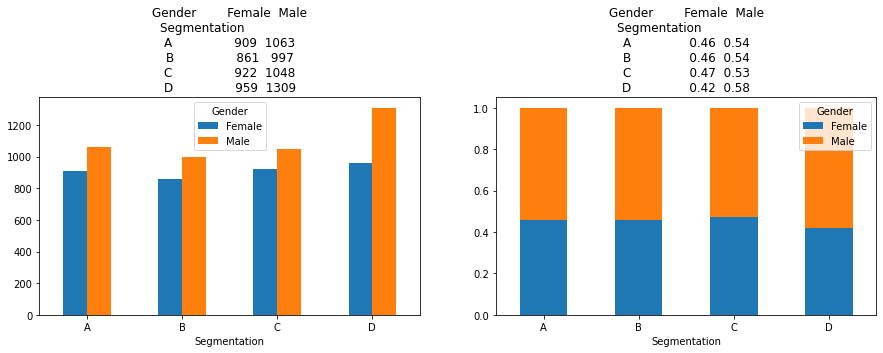

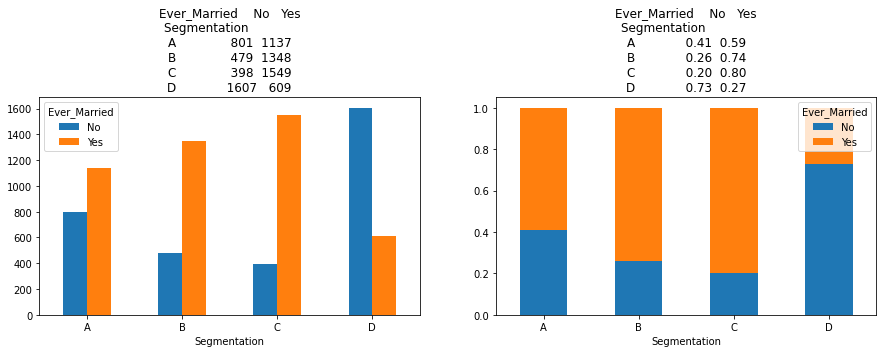

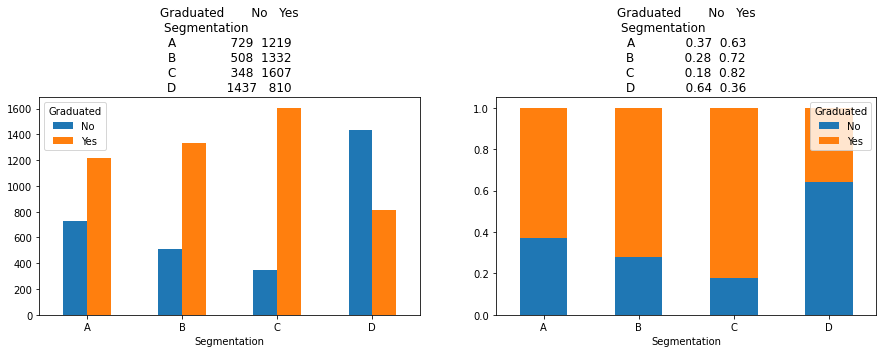

In [3]:

# Segmentation & Gender
ax1 = df.groupby(["Segmentation"])["Gender"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Gender',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))

# Segmentation & Ever_Married
ax1 = df.groupby(["Segmentation"])["Ever_Married"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Ever_Married',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


# Segmentation & Graduated
ax1 = df.groupby(["Segmentation"])["Graduated"].value_counts().unstack().round(3)

ax2 = df.pivot_table(columns='Graduated',index='Segmentation',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[0].set_title(str(ax1))

ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_xticklabels(labels = ['A','B','C','D'],rotation = 0)
ax[1].set_title(str(ax2))


plt.show()

In [4]:


df_new = df

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le = LabelEncoder()
df_new
for c in cat:
    df_new[c] = le.fit_transform(df[c])

In [5]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new = df_new.dropna()
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
2,466315,0,1,67,1,2,1.0,2,1.0,5,2
3,461735,1,1,67,1,7,0.0,1,2.0,5,2
5,461319,1,1,56,0,0,0.0,0,2.0,5,3
6,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,0,4
8064,464685,1,0,35,0,4,3.0,2,4.0,3,4
8065,465406,0,0,33,1,5,1.0,2,1.0,5,4
8066,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [6]:
df_f = df_new.iloc[:, 1:-1]
df_t = df_new.iloc[:,-1]

In [7]:
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000
mean,0.549146,0.612713,43.469364,0.644282,2.799541,2.633089,1.349978,2.844167,4.183671
std,0.497614,0.517727,16.531090,0.496424,2.605659,3.402505,0.852783,1.528469,1.431907
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000


In [8]:
def min_max_normalize(l):
    normalized = []
    
    for v in l:
        normalized_num = (v - min(l)) / (max(l) - min(l))
        normalized.append(normalized_num)
    
    return normalized

In [9]:
for i in df_f.columns:
    try:
        df_f[i] = min_max_normalize(df_f[i])
    except KeyError:
        var = 0
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000
mean,0.549146,0.306357,0.358723,0.322141,0.311060,0.188078,0.674989,0.230521,0.597667
std,0.497614,0.258864,0.232832,0.248212,0.289518,0.243036,0.426392,0.191059,0.204558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,0.000000,0.000000,0.500000,0.125000,0.428571
50%,1.000000,0.500000,0.323944,0.500000,0.333333,0.071429,1.000000,0.250000,0.714286
75%,1.000000,0.500000,0.492958,0.500000,0.555556,0.285714,1.000000,0.375000,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/tmp/ipykernel_217/696959442.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))


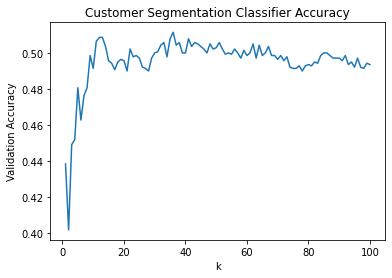

35


In [10]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_X.values, train_Y.values.ravel())
  accuracies.append(knn.score(test_X.values, test_Y.values))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Customer Segmentation Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [11]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(train_X.values, train_Y.values.ravel())

print(knn.score(test_X.values, test_Y.values))

0.5078909612625538


In [12]:
test = pd.read_csv('./Test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [13]:
test = test.iloc[:, 1:]

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le_test = LabelEncoder()

for c in cat:
    test[c] = le.fit_transform(test[c])
    
test = test.dropna()

In [14]:
for i in test.columns:
    try:
        test[i] = min_max_normalize(test[i])
    except KeyError:
        var = 0
test.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000
mean,0.546978,0.308778,0.358630,0.316277,0.315052,0.181990,0.685046,0.229543,0.595942
std,0.497898,0.261417,0.236157,0.249651,0.294432,0.237886,0.424390,0.195208,0.203192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.169014,0.000000,0.000000,0.000000,0.500000,0.125000,0.428571
50%,1.000000,0.500000,0.323944,0.500000,0.222222,0.071429,1.000000,0.125000,0.714286
75%,1.000000,0.500000,0.478873,0.500000,0.555556,0.285714,1.000000,0.375000,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.5,0.253521,0.5,0.222222,0.000000,1.0,0.000,0.714286
1,1.0,0.5,0.267606,0.5,0.555556,0.571429,0.0,0.375,0.714286
2,0.0,0.5,0.718310,0.0,1.000000,0.000000,1.0,0.000,0.714286
3,1.0,0.5,0.577465,0.0,0.444444,0.785714,0.5,0.125,0.714286
5,1.0,0.5,0.408451,0.5,0.111111,0.000000,0.5,0.500,0.428571


In [16]:
test['Segmentation'] = knn.predict(test)
test

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.0,0.5,0.253521,0.5,0.222222,0.000000,1.0,0.000,0.714286,1
1,1.0,0.5,0.267606,0.5,0.555556,0.571429,0.0,0.375,0.714286,2
2,0.0,0.5,0.718310,0.0,1.000000,0.000000,1.0,0.000,0.714286,1
3,1.0,0.5,0.577465,0.0,0.444444,0.785714,0.5,0.125,0.714286,3
5,1.0,0.5,0.408451,0.5,0.111111,0.000000,0.5,0.500,0.428571,2
...,...,...,...,...,...,...,...,...,...,...
2621,0.0,0.0,0.239437,0.5,0.333333,0.071429,1.0,0.125,0.714286,1
2622,1.0,0.0,0.154930,0.0,0.555556,0.642857,1.0,0.375,0.714286,4
2623,0.0,0.0,0.239437,0.5,0.111111,0.071429,1.0,0.000,0.714286,1
2625,1.0,0.5,0.408451,0.5,0.444444,0.071429,0.5,0.500,0.428571,2


In [17]:
df_a = test[test['Segmentation'] == 1]
df_a.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.0
mean,0.518198,0.297227,0.391876,0.311092,0.274600,0.191013,0.890815,0.149913,0.583808,1.0
std,0.500102,0.275680,0.247076,0.251416,0.275445,0.251109,0.268811,0.167323,0.204442,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.211268,0.000000,0.000000,0.000000,1.000000,0.000000,0.428571,1.0
50%,1.000000,0.500000,0.323944,0.500000,0.222222,0.071429,1.000000,0.125000,0.714286,1.0
75%,1.000000,0.500000,0.521127,0.500000,0.333333,0.285714,1.000000,0.250000,0.714286,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [18]:
df_b = test[test['Segmentation'] == 2]
df_b.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.0
mean,0.428894,0.411964,0.453597,0.355530,0.301981,0.172847,0.571106,0.195542,0.590132,2.0
std,0.495478,0.218316,0.207065,0.239031,0.295476,0.226181,0.437264,0.191826,0.198852,0.0
min,0.000000,0.000000,0.028169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.500000,0.295775,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,2.0
50%,0.000000,0.500000,0.408451,0.500000,0.222222,0.071429,0.500000,0.125000,0.714286,2.0
75%,1.000000,0.500000,0.591549,0.500000,0.444444,0.285714,1.000000,0.375000,0.714286,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [19]:
df_c = test[test['Segmentation'] == 3]
df_c.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.0
mean,0.601695,0.505932,0.467653,0.472034,0.134275,0.156053,0.228814,0.233898,0.642131,3.0
std,0.489964,0.061521,0.178815,0.132166,0.218674,0.209541,0.328629,0.148940,0.180422,0.0
min,0.000000,0.000000,0.098592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.000000,0.500000,0.338028,0.500000,0.000000,0.000000,0.000000,0.125000,0.714286,3.0
50%,1.000000,0.500000,0.443662,0.500000,0.000000,0.071429,0.000000,0.250000,0.714286,3.0
75%,1.000000,0.500000,0.577465,0.500000,0.222222,0.214286,0.500000,0.375000,0.714286,3.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [20]:
df_d = test[test['Segmentation'] == 4]
df_d.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.0
mean,0.602740,0.072298,0.167492,0.154490,0.521732,0.203523,0.990868,0.318493,0.569037,4.0
std,0.489704,0.188527,0.164632,0.237714,0.239469,0.254991,0.077550,0.219171,0.217371,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,0.056338,0.000000,0.333333,0.000000,1.000000,0.125000,0.428571,4.0
50%,1.000000,0.000000,0.140845,0.000000,0.555556,0.071429,1.000000,0.375000,0.714286,4.0
75%,1.000000,0.000000,0.211268,0.500000,0.555556,0.357143,1.000000,0.500000,0.714286,4.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0


#### Correlation Matrix

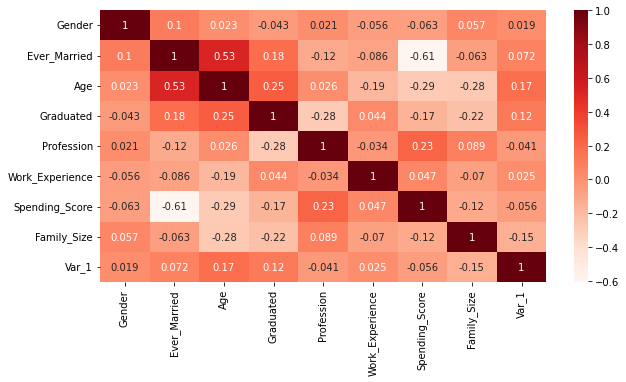

In [31]:
# plot a correlation matrix
plt.figure(figsize=(10,5))
cor = train_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Importance

Gender: 0.0452182951675086
Ever_Married: 0.027230236108310924
Age: 0.3715875464075033
Graduated: 0.03760596890507113
Profession: 0.1224770841125044
Work_Experience: 0.15265850087068325
Spending_Score: 0.05700524810145582
Family_Size: 0.10184442662503229
Var_1: 0.08437269370193021


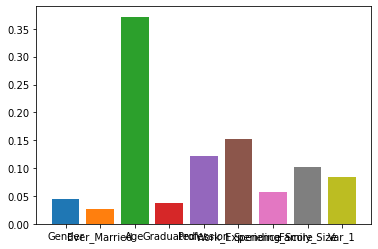

In [30]:
# Feature importance

classifier = DecisionTreeClassifier()
classifier.fit(train_X, train_Y)
for name, importance in zip(train_X.columns, classifier.feature_importances_):
    print(f'{name}: {importance}')
    # plot feature importance
    plt.bar(name, importance)
plt.show()

### K-means

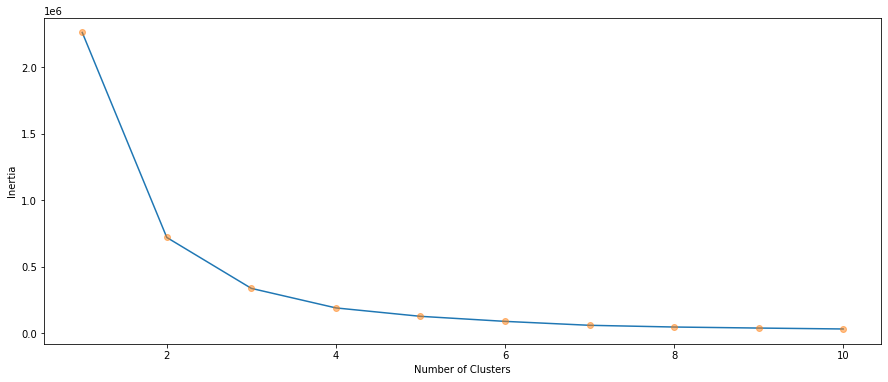

In [34]:
# Age & Spending Score
X1 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for i in range(1 , 11):
    algorithm = KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 105  , algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.plot(np.arange(1 , 11) , inertia , 'o' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

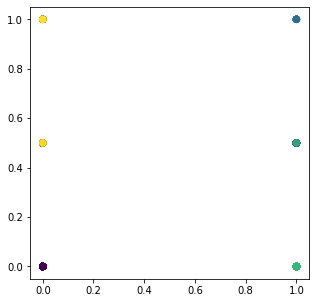

In [37]:
# K-means model
f, ax  = plt.subplots(figsize = (5,5))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=103)
y_kmeans_train = kmeansmodel.fit_predict(train_X)

plt.scatter(train_X.iloc[:,0], train_X.iloc[:,1], c=y_kmeans_train, alpha=0.7, s=40)

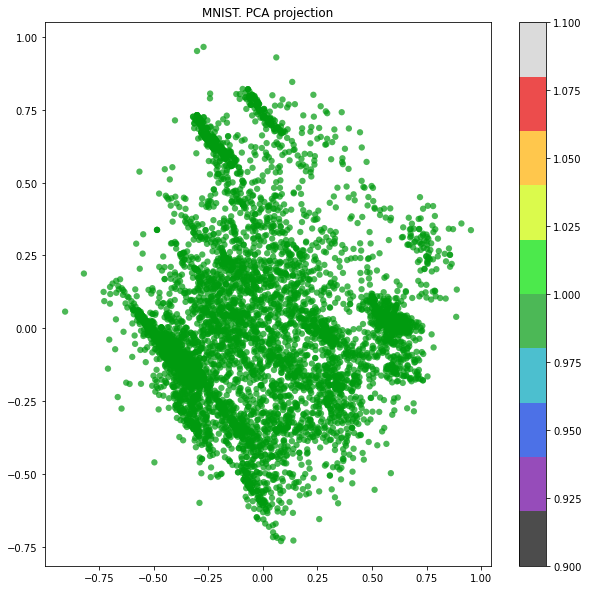

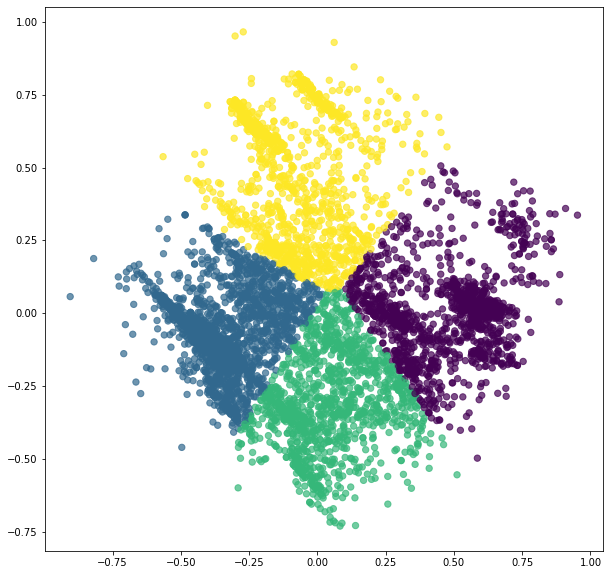

In [41]:
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition
# Gender & Spending Score
pca = decomposition.PCA(n_components=2)
reduced_train_X = pca.fit_transform(train_X.drop(columns=["Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(reduced_train_X[:, 0], reduced_train_X[:, 1], c=[1]*train_X.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=102)
y_kmeans_train = kmeansmodel.fit_predict(reduced_train_X)

plt.scatter(reduced_train_X[:,0], reduced_train_X[:,1], c=y_kmeans_train, alpha=0.7, s=40)